In [19]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Phone Ranking Problem

Choosing a new phone is often quite a daunting task, with many different models from different companies and varying prices.

In [53]:
data = pd.read_csv("./data/dataset.csv")
prefs = pd.read_csv("./data/preferences.csv")

In [3]:
data

,name,price-cost,ram-gain,screen-gain,disk-gain,oled-gain,os-gain,foldable-gain
0,Huawei P30,1699,6.000,6.10,128,1,3,0
1,Huawei P20 Lite,899,4.000,5.80,64,0,3,0
2,Iphone 15,4699,6.000,6.70,128,1,0,0
3,Iphone 12,2499,4.000,6.10,64,1,0,0
4,Motorola Razr Ultra,3999,8.000,6.90,256,1,3,1
5,Motorola Razr 40,2999,8.000,6.90,256,1,3,1
6,Samsung Galaxy Z Flip 5,5599,8.000,6.70,256,1,3,1
7,Motorola Razr 8,2657,8.000,6.67,256,1,3,1
8,Nokia 2660 Flip,299,4.000,2.80,128,1,1,1
9,Huawei P40,1949,8.000,6.10,128,1,2,0


In [98]:
crit_types = [True if crit.split("-")[1]=="gain" else False for crit in data.drop(columns="name").columns ]
crit_types

[0, 1, 1, 1, 1, 1, 1]


1. What is the domain of the problem about?
	
	The problem involves constinst of various phones and some of their parameters. 
	Price is given in złoty's, Ram in GB, Screen in inches, disk in GB, Oled and Foldable are binary variables and its beneficial for the phone to have them.
	OS ranks the operating systems with 0 being iOS, 1 being other, 2 being HarmonyOS and 3 being Android.

2. What is the source of the data?

	The data is taken from the internet from various online shops that offer these phones.

In [94]:
def type_1(d):
	return 1 if d > 0 else 0

def type_5(d,q:float,p:float):
	if d > p:
		return 1
	elif d < q:
		return 0
	else: 
		(d-q)/(p-q)

In [100]:
def rank_string(ranking,names):
	_str = ""
	for i,n in sorted(zip(ranking,names),key=lambda a:a[0]):
		_str += f"{i}:\t{n}"
	return _str

def show_rank(ranking,names):
	print(rank_string(ranking,names))

In [102]:
class Promethee:
	def __init__(self,data,criterion_type,criterion_weights=None,discrimination_thresholds=None):
		self.data = data.drop(columns="name")
		self.names = data["name"]
		self.ranking = [i for i in range(len(self.names))]
		self.is_crit_gain = criterion_type
		self.criterion_weighs = criterion_weights
		self.criterion_funcs = self._init_crit_funcs(discrimination_thresholds)

	def _init_crit_funcs(self,disc_thresh):
		return [lambda a,b: type5(a-b,q,p) if self.is_crit_gain else type5(b-a,q,p) for q,p in disc_thresh]
		

	def _cp_index(self,data:pd.DataFrame,criterion_weights:list[float]=None,criterion_func:list[callable]=None)->np.array:

		n = len(data)
		matrix = np.zeros((n,n))

		if criterion_weights==None:
			criterion_weights = [1 for _ in data.columns]

		if criterion_func == None:
			criterion_func = [type_1 for _ in criterion_weights]

		for c,criterion in enumerate(data.columns):
			for i,a in enumerate(data[criterion]):
				for j,b in enumerate(data[criterion][i+1:],i+1):
					pi = criterion_func[c]
					w = criterion_weights[c]
					matrix[i][j] += w * pi(a,b)
					matrix[j][i] += w * pi(b,a)
		
		return matrix/sum(criterion_weights)
	
	def _flow(cpi:np.array):
		positive_flow = np.sum(np.triu(cpi),axis=1)
		negative_flow = np.sum(np.triu(cpi.T),axis=1)

		return positive_flow,negative_flow
	
	def __str__(self):
		return rank_string(self.ranking,self.names)

In [103]:
class Promethee1(Promethee):
	def rank(self):
		cpi = self._cp_index(data)
		pos_flow,neg_flow = self._flow(cpi)

		self.pos_rank = np.argsort(-pos_flow)
		self.neg_rank = np.argsort(neg_flow)

		

		return self.ranking

In [104]:
class Promethee2(Promethee):
	def rank(self):
		cpi = self._cp_index(data)
		pos_flow,neg_flow = self._flow(cpi)

		f = pos_flow-neg_flow

		self.ranking = np.argsort(-f)

		return self.ranking

In [77]:
estimated_weights = [7,5,3,4,4,8,5]

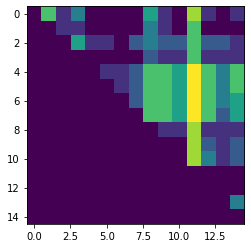

In [29]:
cpi = cp_index(data.drop(columns="name"))
plt.imshow(cpi, interpolation='nearest')
plt.show()

In [37]:
def 

In [38]:
flow(cpi)

(array([3.14285714, 1.57142857, 3.57142857, 1.71428571, 5.42857143,
        5.28571429, 5.        , 4.57142857, 1.57142857, 1.57142857,
        1.71428571, 0.        , 0.        , 0.42857143, 0.        ]),
 array([4.85714286, 8.57142857, 4.57142857, 6.71428571, 0.42857143,
        0.42857143, 0.42857143, 0.42857143, 3.        , 1.57142857,
        0.57142857, 2.57142857, 0.85714286, 0.14285714, 0.        ]))

In [90]:
show_rank(prom2_rank,data["name"])

0:	Huawei P40
1:	Lg V60
2:	Samsung Galaxy A55
3:	Xiaomi Poco X6 Pro
4:	Huawei P30
5:	Huawei P20 Lite
6:	Iphone 15
7:	Iphone 12
8:	Nokia 3310
9:	Samsung Galaxy Z Flip 5
10:	Motorola Razr Ultra
11:	Samsung Galaxy M34
12:	Nokia 2660 Flip
13:	Motorola Razr 40
14:	Motorola Razr 8


In [91]:
show_rank(prom1_pos,data["name"])

0:	Motorola Razr 40
1:	Samsung Galaxy Z Flip 5
2:	Motorola Razr Ultra
3:	Motorola Razr 8
4:	Huawei P30
5:	Huawei P20 Lite
6:	Iphone 15
7:	Iphone 12
8:	Samsung Galaxy A55
9:	Huawei P40
10:	Nokia 2660 Flip
11:	Samsung Galaxy M34
12:	Xiaomi Poco X6 Pro
13:	Nokia 3310
14:	Lg V60


In [92]:
show_rank(prom1_neg,data["name"])

0:	Nokia 3310
1:	Lg V60
2:	Samsung Galaxy M34
3:	Xiaomi Poco X6 Pro
4:	Motorola Razr 40
5:	Samsung Galaxy Z Flip 5
6:	Iphone 15
7:	Iphone 12
8:	Samsung Galaxy A55
9:	Nokia 2660 Flip
10:	Motorola Razr Ultra
11:	Huawei P40
12:	Motorola Razr 8
13:	Huawei P20 Lite
14:	Huawei P30
